In [82]:
##loading module
import numpy as np
import pandas as pd
import cv2
from tensorflow.python.keras import Sequential
#from keras.models import load_model
import time
import keras.backend as k1
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,MaxPooling2D,Dropout
from tensorflow.python.keras.regularizers import l2
from skimage.io import imread,imshow
from skimage.transform import resize
#\from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D,Convolution2D,AveragePooling2D,MaxPooling2D
#from tensorflow.keras.layers import BatchNormalization

#from tensorflow.keras.models import Model
#from tensorflow.keras.applications import DenseNet121,DenseNet169

from keras.applications.densenet import preprocess_input
from tensorflow.python.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
print(l)

['augmented-image/late-blight', 'augmented-image/early-blight', 'augmented-image/backkleg', 'augmented-image/septoria', 'augmented-image/safe']


In [3]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


In [29]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],100,100,3)
print(x.shape)
y1=y

(1608, 100, 100, 3)


In [30]:
x=x/255.0


In [31]:
lb=LabelEncoder()
y1=lb.fit_transform(y)
y=to_categorical(y1)
print(y.shape,y1.shape)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]] [2 2 2 ... 3 3 3]


In [32]:
print(x.shape,y.shape)
k1.clear_session()

(1608, 100, 100, 3) (1608, 5)


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=42)

In [45]:
y_train=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [46]:
y_test1.shape

(483, 5)

In [50]:
x_train.shape
k1.clear_session()

In [48]:
def ClsModel_69(n_classes=5, input_shape=(100,100,3)):
    base_model = DenseNet169(weights=None, include_top=False, input_shape=input_shape)
    x=base_model.output
    x =Flatten()(x)

    x =BatchNormalization()(x)

    

    x =Dropout(0.5)(x)

    x =BatchNormalization()(x)
    x=Dense(1024,activation="relu")(x)
    x =Dense(units=128,
                       activation='relu',
                       )(x)

    x =Dropout(0.5)(x)


    preds=Dense(n_classes,activation='softmax')(x) #
    model=Model(inputs=base_model.input,outputs=preds)
    return model

In [51]:
model169=ClsModel_69(5,(100,100,3))
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [52]:
for layer in model169.layers[:-5]:

    layer.trainable=False

    

for layer in model169.layers[-5:]:

    layer.trainable=True

In [53]:

model169.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])
model169.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [54]:
start = time.time()

# define a sample code segment
history=model169.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1,validation_data=(x_test, y_test1))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/20


2022-11-19 14:20:05.886741: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 135000000 exceeds 10% of free system memory.


36/36 [==============================] - 60s 1s/step - loss: 0.7430 - accuracy: 0.7182 - val_loss: 1.4114 - val_accuracy: 0.4741
Epoch 2/20
36/36 [==============================] - 43s 1s/step - loss: 0.2992 - accuracy: 0.8862 - val_loss: 1.3884 - val_accuracy: 0.3975
Epoch 3/20
36/36 [==============================] - 43s 1s/step - loss: 0.1975 - accuracy: 0.9307 - val_loss: 1.2668 - val_accuracy: 0.2795
Epoch 4/20
36/36 [==============================] - 43s 1s/step - loss: 0.1563 - accuracy: 0.9440 - val_loss: 1.1370 - val_accuracy: 0.3333
Epoch 5/20
36/36 [==============================] - 45s 1s/step - loss: 0.1248 - accuracy: 0.9573 - val_loss: 0.9581 - val_accuracy: 0.6646
Epoch 6/20
36/36 [==============================] - 44s 1s/step - loss: 0.1144 - accuracy: 0.9538 - val_loss: 0.9505 - val_accuracy: 0.6770
Epoch 7/20
36/36 [==============================] - 46s 1s/step - loss: 0.0861 - accuracy: 0.9716 - val_loss: 0.6590 - val_accuracy: 0.7681
Epoch 8/20
36/36 [=============

In [15]:
start = time.time()

# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)


read_img = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_image=read_img.reshape(-1,100,100,3)
print(model169.predict(read_image))

# record end time

end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

1/1 [==============================] - 4s 4s/step
[[0. 1. 0. 0. 0.]]
execution time is 4359.61389541626 ms


In [55]:
v=model169.predict(x_test)

16/16 [==============================] - 22s 1s/step


In [70]:
rounded_prediction=np.argmax(v,axis=1)
type(rounded_prediction)
#rounded_prediction=list(rounded_prediction)


numpy.ndarray

In [68]:
rounded_labels=np.argmax(y_test1, axis=1)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score,recall_score,plot_confusion_matrix
print(classification_report(rounded_labels,rounded_prediction))
cm=confusion_matrix(rounded_labels,rounded_prediction)
print("confusion_matrix is: ",confusion_matrix(rounded_labels,rounded_prediction))
print("precision score is: ",precision_score(rounded_labels,rounded_prediction,average='micro'))
print("f1_score is: ",f1_score(rounded_labels,rounded_prediction,average='micro'))

print("recall is: ",recall_score(rounded_labels,rounded_prediction,average='micro'))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        33

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483

confusion_matrix is:  [[145   0   0   0   0]
 [  0 127   0   0   0]
 [  0   0 124   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0  33]]
precision score is:  1.0
f1_score is:  1.0
recall is:  1.0


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =[[145,0,0,0,0],[0,127,0,0,0],[0,0,124,0,0],[0,0,0,54,0],[0,0,0,0,33]]

df_cm = pd.DataFrame(array, range(5), range(5))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":12}) # font size

plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step


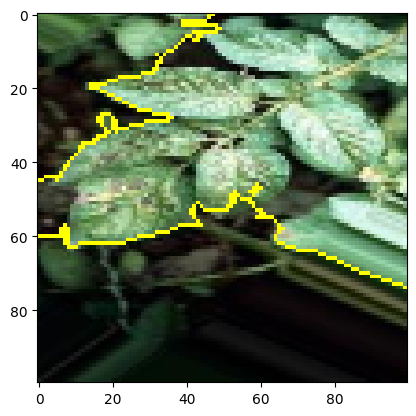

In [33]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

read_img = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_img= cv2.cvtColor(read_img, cv2.COLOR_RGB2BGR)
plt.imshow(read_img)
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         read_img, 
         model169.predict
)

image, mask = explanation.get_image_and_mask(
         model169.predict(
              read_img.reshape(-1,100,100,3)
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))


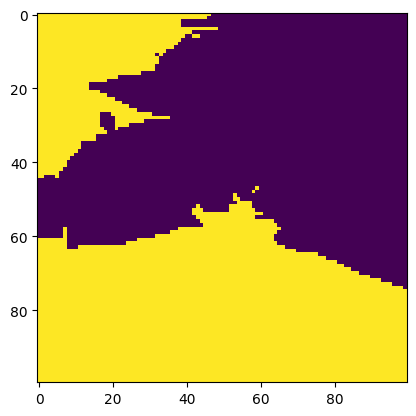

In [34]:
plt.imshow(mask)

In [37]:
import shap
shap.initjs()
class_labels=['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']


In [38]:
masker = shap.maskers.Image("blur(28,28)", x_train[0].shape)

explainer = shap.Explainer(model169, masker, output_names=class_labels)

explainer

In [39]:
shap_values = explainer(x_test[5:9], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 3/4 [01:23<00:19, 19.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 4/4 [02:01<00:00, 26.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [02:40, 40.07s/it]                       


(4, 100, 100, 3, 5)

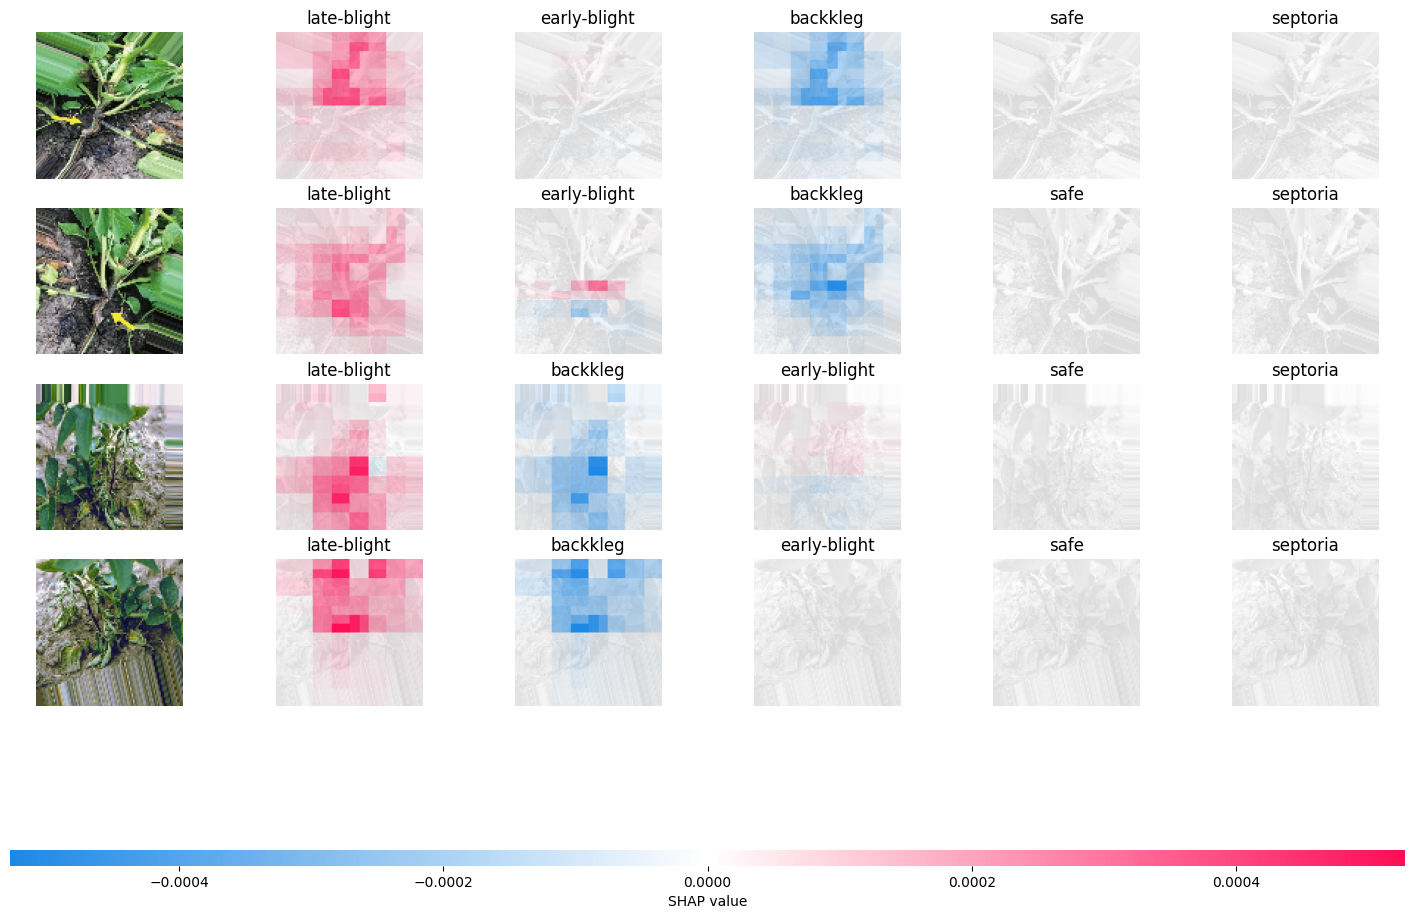

In [40]:
shap.image_plot(shap_values)

In [83]:
##svm using keras-cnn
k1.clear_session()
svm=Sequential()
svm.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(100,100,3)))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Flatten())
svm.add(Dense(128,activation="relu"))

#Output layer
svm.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))


In [84]:
svm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [85]:
start = time.time()

# define a sample code segment

svm.compile(optimizer="Adam",loss="squared_hinge", metrics = ['accuracy'])
svm.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test1))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

2022-11-19 14:52:41.630159: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 135000000 exceeds 10% of free system memory.


Epoch 1/20
9/9 [==============================] - 19s 2s/step - loss: 0.8599 - accuracy: 0.2800 - val_loss: 0.6826 - val_accuracy: 0.3395
Epoch 2/20
9/9 [==============================] - 16s 2s/step - loss: 0.6256 - accuracy: 0.4436 - val_loss: 0.5419 - val_accuracy: 0.5466
Epoch 3/20
9/9 [==============================] - 15s 2s/step - loss: 0.4984 - accuracy: 0.5804 - val_loss: 0.4413 - val_accuracy: 0.6460
Epoch 4/20
9/9 [==============================] - 16s 2s/step - loss: 0.3774 - accuracy: 0.8009 - val_loss: 0.3414 - val_accuracy: 0.7992
Epoch 5/20
9/9 [==============================] - 16s 2s/step - loss: 0.2566 - accuracy: 0.9067 - val_loss: 0.2367 - val_accuracy: 0.8592
Epoch 6/20
9/9 [==============================] - 16s 2s/step - loss: 0.1772 - accuracy: 0.9271 - val_loss: 0.1402 - val_accuracy: 0.9917
Epoch 7/20
9/9 [==============================] - 17s 2s/step - loss: 0.1151 - accuracy: 0.9911 - val_loss: 0.1175 - val_accuracy: 0.9710
Epoch 8/20
9/9 [==================

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,f1_score,recall_score,plot_confusion_matrix
v=svm.predict(x_test)
rounded_prediction=np.argmax(v,axis=1)
type(rounded_prediction)
#rounded_prediction=list(rounded_prediction)

print(classification_report(rounded_labels,rounded_prediction))
cm=confusion_matrix(rounded_labels,rounded_prediction)
print("confusion_matrix is: \n",confusion_matrix(rounded_labels,rounded_prediction))
print("precision score is: ",precision_score(rounded_labels,rounded_prediction,average='micro'))
print("f1_score is: ",f1_score(rounded_labels,rounded_prediction,average='micro'))

print("recall is: ",recall_score(rounded_labels,rounded_prediction,average='micro'))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        33

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483

confusion_matrix is: 
 [[145   0   0   0   0]
 [  0 127   0   0   0]
 [  0   0 124   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0  33]]
precision score is:  1.0
f1_score is:  1.0
recall is:  1.0


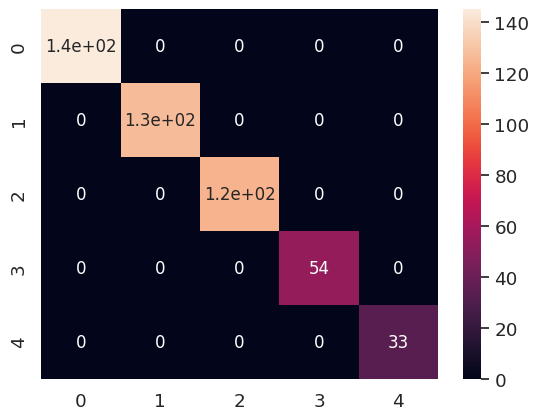

In [97]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =[[145,0,0,0,0],[0,127,0,0,0],[0,0,124,0,0],[0,0,0,54,0],[0,0,0,0,33]]

df_cm = pd.DataFrame(array, range(5), range(5))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":12}) # font size

plt.show()

In [39]:
start = time.time()

# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
read_img = cv2.imread("early-blight1_0_2175.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_img= cv2.cvtColor(read_img, cv2.COLOR_RGB2BGR)
print(svm.predict(read_image))

# record end time

end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

[[  123.24221  -121.12101  -454.61798  -520.7351  -1091.1324 ]]
execution time is 236.62662506103516 ms


  0%|          | 0/1000 [00:00<?, ?it/s]

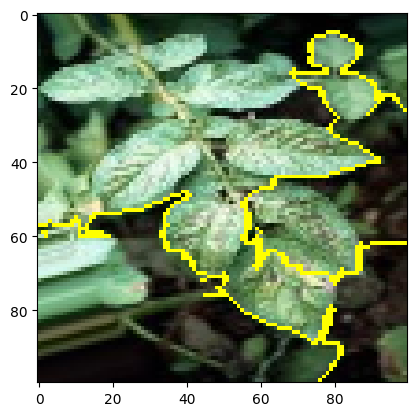

In [59]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

read_img = cv2.imread("early-blight1_0_2175.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_img= cv2.cvtColor(read_img, cv2.COLOR_RGB2BGR)
plt.imshow(read_img)
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         read_img, 
         svm.predict
)

image, mask = explanation.get_image_and_mask(
         svm.predict(
              read_img.reshape(-1,100,100,3)
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))


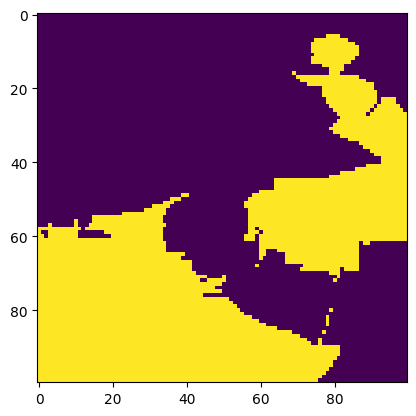

In [60]:
plt.imshow(mask)

In [61]:
import shap
shap.initjs()
class_labels=['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']


In [62]:
masker = shap.maskers.Image("blur(28,28)", x_train[0].shape)

explainer = shap.Explainer(model169, masker, output_names=class_labels)

explainer

In [63]:
shap_values = explainer(x_test[5:9], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  25%|██▌       | 1/4 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  75%|███████▌  | 3/4 [01:18<00:19, 19.42s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 4/4 [01:56<00:00, 27.33s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 5it [02:35, 38.77s/it]                       


(4, 100, 100, 3, 5)

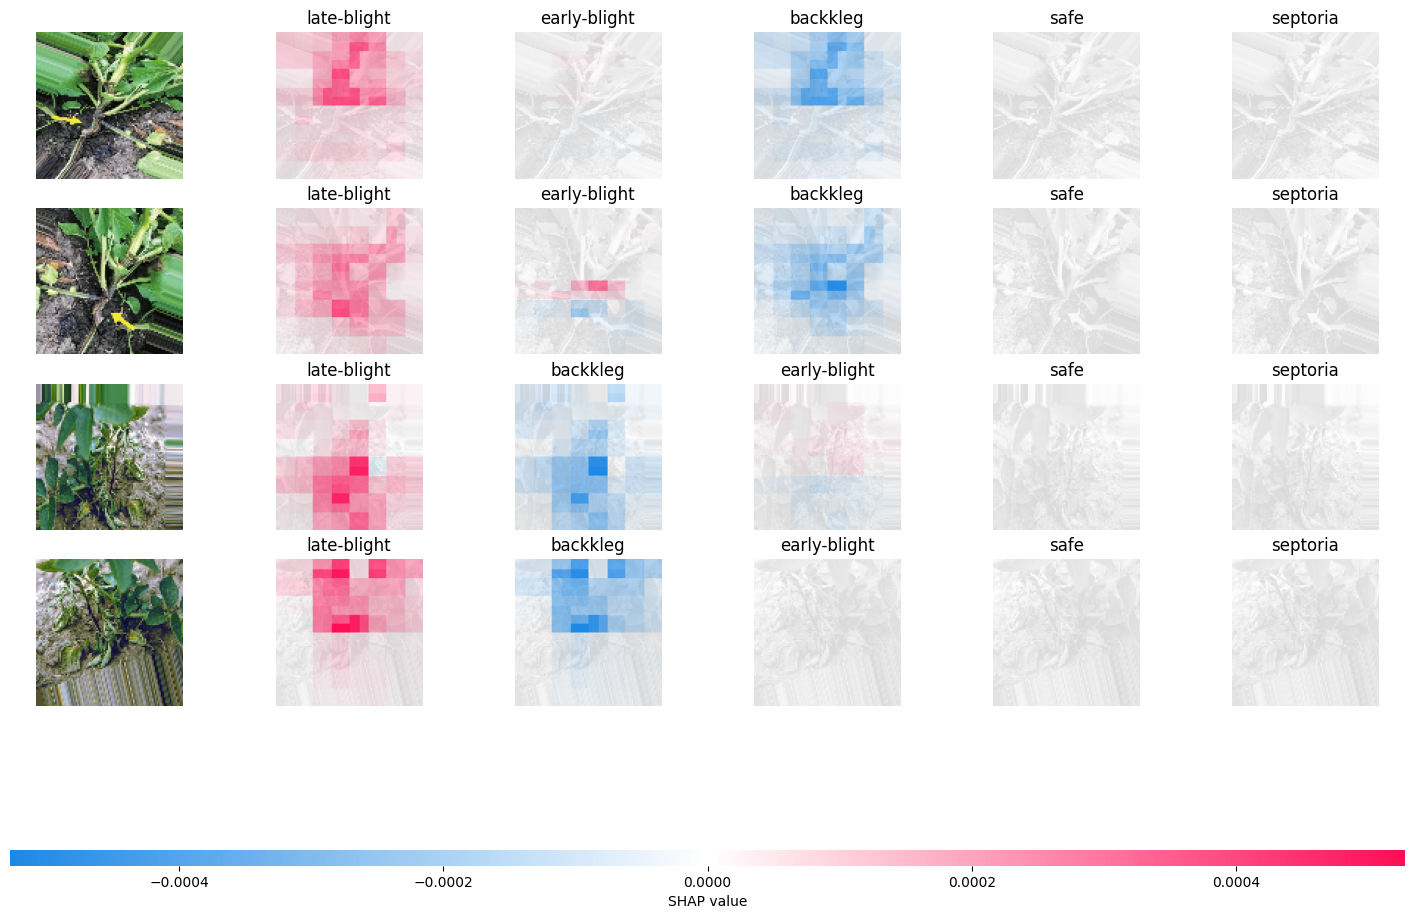

In [64]:
shap.image_plot(shap_values)

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score


In [20]:
y_preb_169=model169.predict(x_test)
y_preb_svm=svm.predict_proba(x_test)

16/16 [==============================] - 29s 1s/step


/home/hrithik/.local/lib/python3.10/site-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [80]:

auc_keras_169 =roc_auc_score(y_test,y_preb_169)
auc_keras_svm=roc_auc_score(y_test,y_preb_svm)

In [22]:
y1=y_test.flatten()
y2_169=y_preb_169.flatten()
y2_svm=y_preb_svm.flatten()

In [88]:
ns_fpr, ns_tpr, _ = roc_curve(y1,y2_169)
ns_fpr1, ns_tpr1, _ = roc_curve(y1,y2_svm)

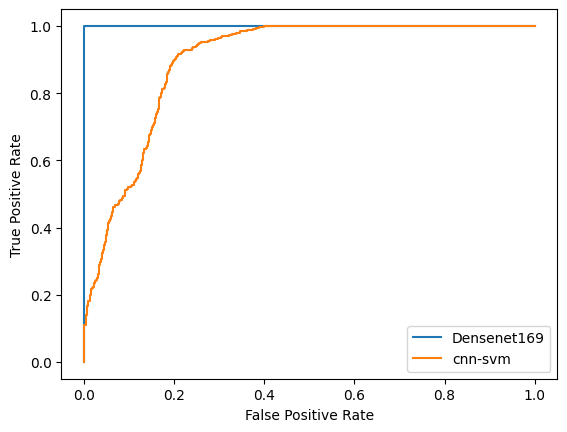

In [89]:
plt.plot(ns_fpr, ns_tpr, linestyle='-', label='Densenet169')
plt.plot(ns_fpr1, ns_tpr1, linestyle='-', label='cnn-svm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [27]:
from scipy import stats
t_value,p_value=stats.ttest_rel(y1,y2_169)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

Test statistic is 0.000025
p-value for one_tailed_test is 0.499990


In [28]:
if one_tailed_p_value<=alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,"We reject the null hypothesis H0")
else:
    print("not good")


not good


In [29]:
from scipy import stats
t_value,p_value=stats.ttest_rel(y1,y2_svm)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

Test statistic is 52.863727
p-value for one_tailed_test is 0.000000


In [30]:

if one_tailed_p_value<=alpha:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,"We reject the null hypothesis H0")
else:
    print("not good")


Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0


In case of svm-cnn we need to reject null hypothesis but for densenet169 don't need to reject

Execution time 